In [36]:
#Librerias_datos
import pandas as pd
import numpy as np
import os

#Librerias_graficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


In [37]:
# Defino el rango de datos

logistica = pd.read_csv("C:\python\logistica\data.csv", sep = ",")

In [38]:
#Imprimo los datos
logistica

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [39]:
#Analisis de fumadores por edad
fumador_por_edad = logistica.groupby  (['age']).count()['currentSmoker']
fumador_por_edad

age
32      1
33      5
34     18
35     42
36     84
37     92
38    144
39    169
40    191
41    174
42    180
43    159
44    166
45    162
46    182
47    141
48    173
49    132
50    140
51    146
52    149
53    139
54    132
55    145
56    123
57    123
58    117
59    119
60    111
61    110
62     99
63    110
64     93
65     57
66     38
67     45
68     18
69      7
70      2
Name: currentSmoker, dtype: int64

Text(0, 0.5, 'Numero de fumadores recurrentes')

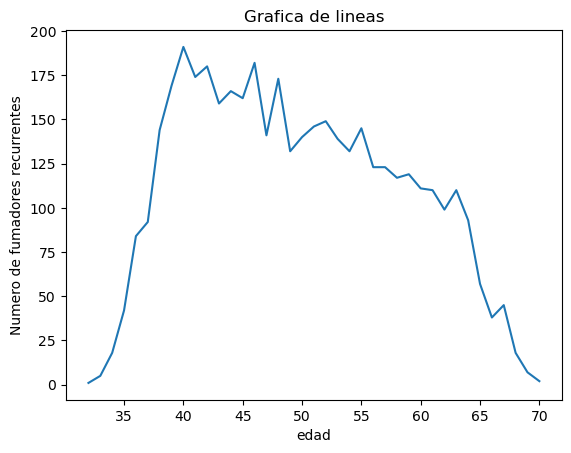

In [40]:
#Grafica de fumadores por edad
plt.plot(fumador_por_edad)
plt.title('Grafica de lineas')
plt.xlabel('edad')
plt.ylabel('Numero de fumadores recurrentes')

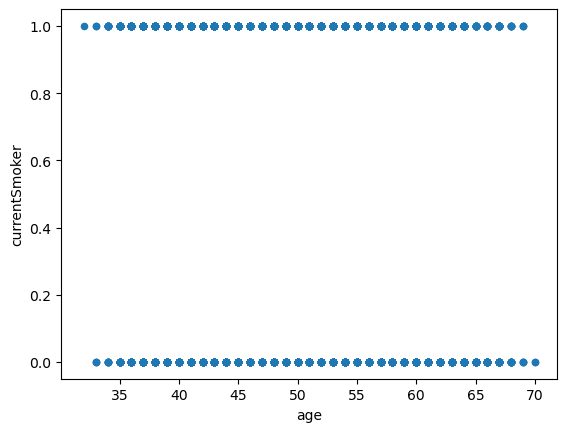

In [44]:
#Definición de variables para analisis edad(age) vs Fumador recurrente(currentSmoker)
logistica[['age','currentSmoker']].head()

# Grafica de dispersion
logistica.plot.scatter(x= "age", y = "currentSmoker")
plt.show()

In [52]:
# Función logistica tomando en cuenta las variables

from sklearn.linear_model import LogisticRegression

# definiendo input y output
X_logistica = np.array(logistica['age']).reshape((-1, 1))
Y_logistica = np.array(logistica['currentSmoker'])

# creando modelo
modelo = LogisticRegression()
modelo.fit(X_logistica, Y_logistica)

# imprimiendo parametros
print(f"intercepto (b): {modelo.intercept_}")
print(f"pendiente (w): {modelo.coef_}")

intercepto (b): [2.52780256]
pendiente (w): [[-0.0515095]]


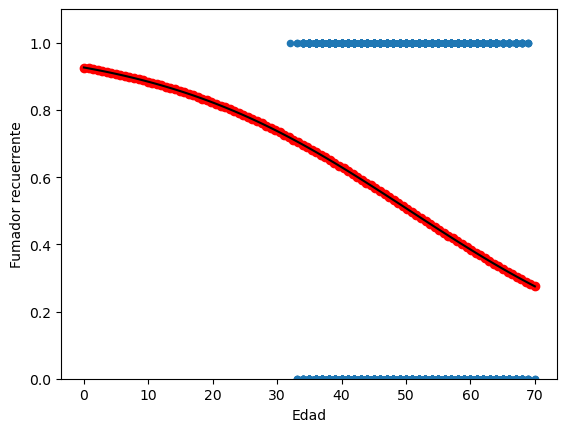

In [53]:
# puntos de la recta
b = 2.53
w = -0.05
x = np.linspace(0,logistica['age'].max(),100)
y = 1/(1+np.exp(-(w*x+b)))

# grafica de la recta
logistica.plot.scatter(x='age',y='currentSmoker')
plt.plot(x, y, color='black')
plt.ylim(0,logistica['currentSmoker'].max()*1.1)
plt.scatter(x, y, color='red')
# plt.grid()
plt.xlabel('Edad')
plt.ylabel('Fumador recuerrente')
plt.show()